# Project: Investigate a Dataset: "What makes a movie successful?"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#lim">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction
Nowadays, watching movies is one of the most common hobbies for human beings regardless of age. Over the last 30 years there have been an revolution of the movie industry: budget expent, the special effects and new technologies like 3D that increase the whole 'customer experience'. 

In the following study we will focus to identify factors (genre, actors, runtime, etc) that lead to the making of succesful movies. In this sense, successful movies are the ones where difference between revenue and budget is maximized. 

In [2]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format



<a id='wrangling'></a>
## Data Wrangling

When working with data is important to ensure its quality, to do so there are certain minimum aspects that must be reviewed:

* Missing information or null values

* Incorrect data types

* Unnecessary information

* Duplicated entries

### General Properties

In [3]:
# Loading the data and printing the output to define next data wrangling steps

data = pd.read_csv('data-movies.csv', sep = ',')
data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


### Initial Observations

- The data has 2 columns representing IDs **id** and **IMBD_ID**

- Budget and revenue are recorded without a currency description. By investigating directly in [TMDB](https://www.themoviedb.org/movie/135397-jurassic-world) and selecting one movie we could get more information to compare. In this case it seems that the currency is USD.

- Cast, genre and production companies contains multiple strings (different length) separated by "|"

- Vote count, vote average lack a measurement unit

### Identifying the existence of missing or null values

In [4]:
#using info() is possible to get an overview of the dataframe, its data types, total entries and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There is a total of **10866** registries, the amount of null values differs from column to column, so we'll need to check in detail each column to verify if the information can be dropped (not necessary for our analysis)

In [5]:
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

From this is important that the release_year datatype is changed from object to timestamp

### Data Cleaning

In the previous section we already outlined some of the actions to be taken to clean our data set.

#### 1- Find Duplicates

Verify if there are duplicated rows in the dataframe

In [6]:
if sum(data.duplicated())>0:
    data.drop_duplicates(inplace=True)
    print("Duplicates entries were discarded")

Duplicates entries were discarded


#### 2- Change data types

In [7]:
data['release_date'] = pd.to_datetime(data['release_date'])
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923.09,1385748801.47


#### 3- Identify Null Values and Missing Information

From one of the previous section (*info()*), we identified that there are null values in more than 5 columns, so we need to analyze one by one specially if we are going to use them for our analysis.

In [8]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Based on initial analysis and the results from verifying null values the columns id', 'imdb_id', 'budget_adj', 'revenue_adj','homepage' and 'overview' can be dropped

In [9]:
#Select columns to be deleted in a list

del_col=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj','homepage', 'overview']

#deleting the columns
data= data.drop(del_col,1)

#previewing the new dataset
data.head()


,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015


##### Missing information, when a column is 0

In order to clean our data and proceed with our analysis, let's take a look at the data in columns budget and revenue making emphasis when either of them is equal to 0

In [10]:
base_calc = data[(data['budget']==0)|(data['revenue']==0)]['popularity']
missing_data = base_calc.shape[0]/data.shape[0]*100
total_rows_affected = base_calc.shape[0]

print("There is a total of {} rows with missing data that represents a {}% of missing data in budget and revenue".format(total_rows_affected,missing_data))

There is a total of 7011 rows with missing data that represents a 64.52830188679245% of missing data in budget and revenue


Given that the percentage of affected columns is more than 64%, instead of dropping all this columns we could flag them as NaN so that we still keep the other columns for further analysis

In [11]:
col_nulls = ['budget', 'revenue']

for i in col_nulls:
    data[i] = data[i].replace(0, np.NaN)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 1.3+ MB


##### Runtime == 0

In [12]:
data[data['runtime']== 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 92 to 8874
Data columns (total 15 columns):
popularity              31 non-null float64
budget                  3 non-null float64
revenue                 0 non-null float64
original_title          31 non-null object
cast                    31 non-null object
director                29 non-null object
tagline                 5 non-null object
keywords                15 non-null object
runtime                 31 non-null int64
genres                  30 non-null object
production_companies    13 non-null object
release_date            31 non-null datetime64[ns]
vote_count              31 non-null int64
vote_average            31 non-null float64
release_year            31 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 3.9+ KB


In this case, because the number of affected rows is small and at least for budget and revenue most of the data points are null we choose to drop the data

In [13]:
data.drop(data.index[data['runtime']== 0], inplace = True)
data.shape

(10834, 15)

<a id='eda'></a>
## Exploratory Data Analysis


### 1- Most successful movies of all times

As mentioned before, a movie can be considered as successful when its revenue is bigger than the budget expent, so we'll add the column earnings to represent the difference between ***revenue*** and ***budget***

In [14]:
data['earnings'] = data['revenue'] - data['budget']
data.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,earnings
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,1363528810.00
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,228436354.00
2,13.11,110000000.00,295238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,185238201.00


Let's see what are the statistics of our data

In [15]:
data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,earnings
count,10834.00,5166.00,4849.00,10834.00,10834.00,10834.00,10834.00,3854.00
mean,0.65,30755249.34,89238858.71,102.36,217.96,5.98,2001.30,70482919.14
std,1.00,38910250.17,162080146.41,30.95,576.37,0.94,12.82,150619531.50
min,0.00,1.00,2.00,2.00,10.00,1.50,1960.00,-413912431.00
25%,0.21,6000000.00,7732325.00,90.00,17.00,5.40,1995.00,-1321535.25
50%,0.38,17000000.00,31853080.00,99.00,38.00,6.00,2006.00,20020190.00
75%,0.72,40000000.00,99965753.00,112.00,146.00,6.60,2011.00,81703308.00
max,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,2544505847.00


There are different earning margins, so let's take a closer look at earnings statistics to create another column with the earning levels (from low to very high)

In [16]:
bin_edges = []
for i in range (3,8):
    bin_edges.append(data['earnings'].describe()[i])

bin_edges
    

[-413912431.0, -1321535.25, 20020190.0, 81703308.0, 2544505847.0]

In [17]:
earning_level = [ 'low','medium' ,'high' ,'very high' ]

In [18]:
data['earning_level'] = pd.cut(data['earnings'], bin_edges, labels=earning_level)

# Checks for successful creation of this column
data.groupby('earning_level')['earning_level'].count()

earning_level
low          963
medium       963
high         963
very high    964
Name: earning_level, dtype: int64

In [19]:
data_suc=data.query('earnings > 0')
data_suc.groupby('earning_level')['earning_level'].count()

earning_level
low            0
medium       851
high         963
very high    964
Name: earning_level, dtype: int64

In [20]:
data_suc['earnings'].describe()

count         2778.00
mean     103244454.43
std      165753277.49
min              1.00
25%       15223259.50
50%       46724597.00
75%      120105440.50
max     2544505847.00
Name: earnings, dtype: float64

In [21]:
# Identifizing the MOST successful movie of all times

data_suc[data_suc['earnings']== 2544505847]

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,earnings,earning_level
1386,9.43,237000000.00,2781505847.00,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.10,2009,2544505847.00,very high


### Does Successful movies have a higher average vote?

In [22]:
success_vote_avg = data_suc.groupby(['earning_level'])['vote_average'].mean().tolist()
success_vote_avg[0] = 0
success_vote_avg

[0, 6.1565217391304285, 6.260124610591906, 6.447406639004151]

In [23]:
full_vote_avg = data.groupby(['earning_level'])['vote_average'].mean().tolist()
full_vote_avg

[5.841744548286602, 6.122845275181723, 6.260124610591906, 6.447406639004151]

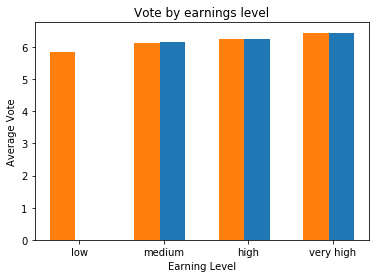

In [34]:
fig, ax = plt.subplots()
index = np.arange(len(earning_level))

success = plt.bar(index+0.3, success_vote_avg,.3)
 
low = plt.bar(index, full_vote_avg,.3)
 
plt.xlabel('Earning Level')
plt.ylabel('Average Vote')
plt.title('Vote by earnings level')
plt.xticks(index + .2, (earning_level));

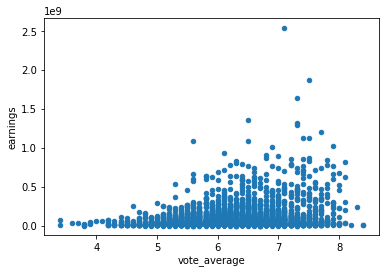

In [35]:
data_suc.plot.scatter(x='vote_average', y='earnings');

There seems to be no direct influence of vote_average over the earnings or viceversa. It seems like most of the votes concentrate between 6 and 7. Especifically the mean of votes for the movies with "very high" earning is  **6.44**

### What's the average runtime for successful movies?

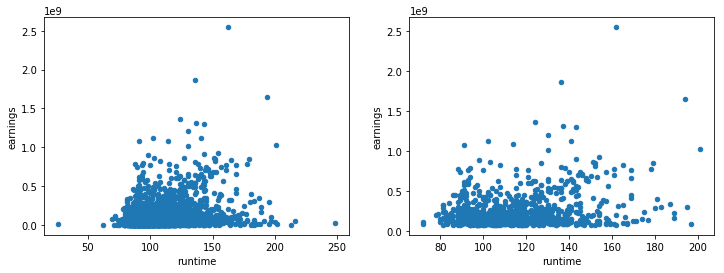

In [36]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)

data_suc.plot.scatter(ax=axs[0],x='runtime', y='earnings')
data_suc[data_suc['earning_level']=='very high'].plot.scatter(ax=axs[1],x='runtime', y='earnings')

plt.show();

If we look at the data from all movies, the runtime average is **102.36 mins**. By looking at the visualizations above is clear that the most succesful movies last at least **70 mins**

### Earnings vs Budget and Revenue

In [37]:
#Calculate the statistics for the successful movies
data_suc.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,earnings
count,2778.00,2778.00,2778.00,2778.00,2778.00,2778.00,2778.00,2778.00
mean,1.41,40275147.33,143519601.76,110.17,678.69,6.29,2000.57,103244454.43
std,1.66,45573115.00,196175612.08,20.13,989.41,0.76,11.99,165753277.49
min,0.00,1.00,11.00,26.00,10.00,3.40,1960.00,1.00
25%,0.57,10000000.00,32776795.75,96.00,118.00,5.80,1994.00,15223259.50
50%,0.99,25000000.00,77639627.00,106.00,318.00,6.30,2004.00,46724597.00
75%,1.65,54000000.00,171576195.25,121.00,779.75,6.80,2010.00,120105440.50
max,32.99,380000000.00,2781505847.00,248.00,9767.00,8.40,2015.00,2544505847.00


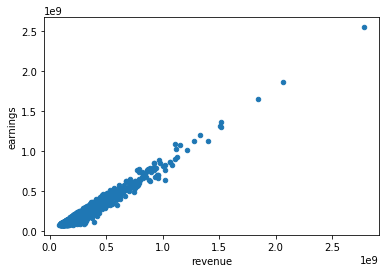

In [38]:
#What's the relation between revenue and earnings of the movies with the highest earnings
data_suc[data_suc['earning_level']=='very high'].plot.scatter(x='revenue', y='earnings')
plt.show();

By analyzing only the movies with an earning higher than zero ("successful movie") the average budget is **40275147.33 USD**. On the other hand, earnings and revenue have a positive correlation which makes sense given the formula used to calculate earnings (revenue - budget)

### Does the cast and director influences the success?

In [39]:
cast_suc = data_suc[data_suc['earning_level'] == 'very high']['cast'].str.cat(sep = '|')
cast_suc = pd.Series(cast_suc.split('|'))
cast_suc = cast_suc.groupby(cast_suc).count().sort_values(ascending=False)
cast_suc = cast_suc.head(15)


In [40]:
cast_low = data[data['earning_level'] == 'low']['cast'].str.cat(sep = '|')
cast_low = pd.Series(cast_low.split('|'))
cast_low = cast_low.groupby(cast_low).count().sort_values(ascending=False)
cast_low = cast_low.head(15)

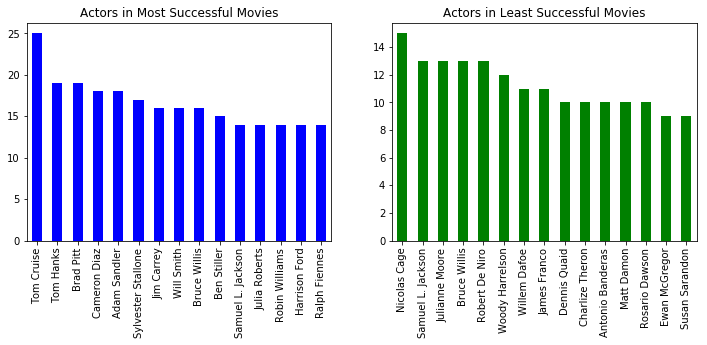

In [41]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)

cast_suc.plot.bar(ax=axs[0], color = 'b').set_title('Actors in Most Successful Movies')
cast_low.plot.bar(ax=axs[1], color = 'g').set_title('Actors in Least Successful Movies')

plt.show()

From the analysis above, it's clear that the most recurrent actor in the successful movies is ***Tom Cruise***, on the other hand actors such as Samuel L Jackson, Bruce Willis appear in both lists (with similar number of movies) maybe this situation could be explained if both actors have a high-rate of appeareances in movies.

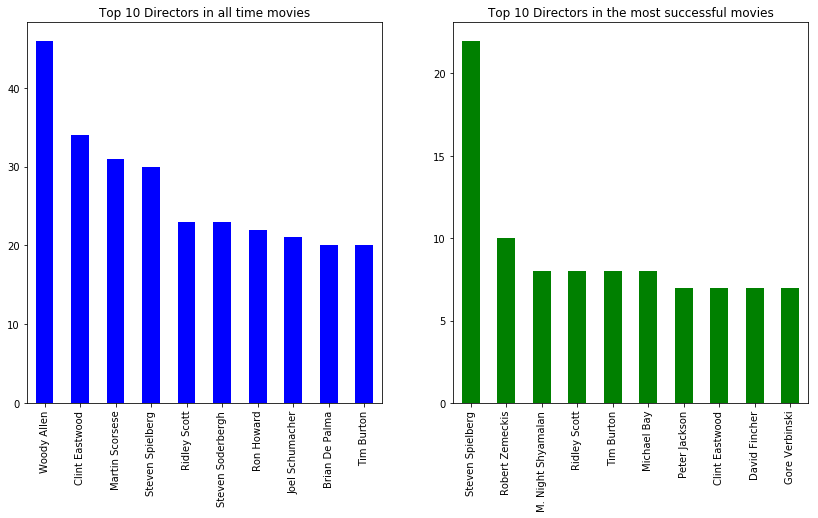

In [42]:
#Applying the same procedure to determine the top 10 directors for all movies and the most successful ones

director = data['director'].str.cat(sep = '|')
director = pd.Series(director.split('|'))
director = director.groupby(director).count().sort_values(ascending=False)
director = director.head(10)

director_suc = data_suc[data_suc['earning_level'] == 'very high']['director'].str.cat(sep = '|')
director_suc = pd.Series(director_suc.split('|'))
director_suc = director_suc.groupby(director_suc).count().sort_values(ascending=False)
director_suc = director_suc.head(10)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(14, 7)

director.plot.bar(ax=axs[0], color = 'b').set_title('Top 10 Directors in all time movies')
director_suc.plot.bar(ax=axs[1], color = 'g').set_title('Top 10 Directors in the most successful movies')

plt.show()

Although **Woody Allen** is the person that directed most movies his name doesn't appear in the top 10 of the most successful movies. It seems like a combination between **Spielberg, Scott, Eastwood and Burton** is a key to higher earnings.

### Which genres are the most successful?

In [43]:
genre_suc = data_suc[data_suc['earning_level'] == 'very high']['genres'].str.cat(sep = '|')
genre_suc = pd.Series(genre_suc.split('|'))
genre_suc = genre_suc.groupby(genre_suc).count().sort_values(ascending=False)
genre_suc = genre_suc.head(5)

In [44]:
genre_low = data[data['earning_level'] == 'low']['genres'].str.cat(sep = '|')
genre_low = pd.Series(genre_low.split('|'))
genre_low = genre_low.groupby(genre_low).count().sort_values(ascending=False)
genre_low = genre_low.head(5)

In [45]:
genre = data['genres'].str.cat(sep = '|')
genre = pd.Series(genre.split('|'))
genre = genre.groupby(genre).count().sort_values(ascending=False)
genre = genre.head(5)

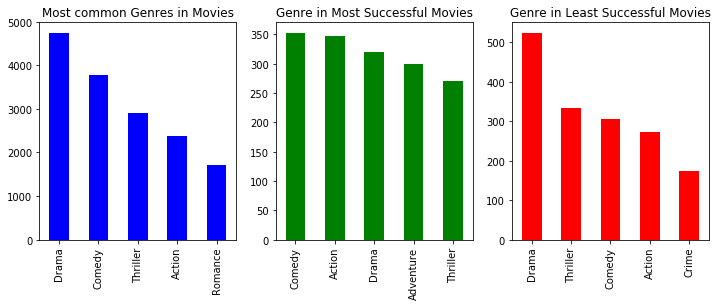

In [46]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12, 4)

genre.plot.bar(ax=axs[0], color = 'b').set_title('Most common Genres in Movies')
genre_suc.plot.bar(ax=axs[1], color = 'g').set_title('Genre in Most Successful Movies')
genre_low.plot.bar(ax=axs[2], color = 'r').set_title('Genre in Least Successful Movies')

plt.show()

Even though we're only looking at the top 5 we can see some interesting patterns, for example ***Drama*** is one of the all time common genres and the ***#1*** in the Least successful movies, but we cannot conclude that there is a causal relation between this genre and the earnings because it's ***#3*** in the most successful movies. A similar analysis can be applied to ***Comedy*** even though is the most successful (earnings) is shown as ***#3*** in the least successful movies

### Which Studios produce the most successful movies?

In [47]:
prod_suc = data_suc[data_suc['earning_level'] == 'very high']['production_companies'].str.cat(sep = '|')
prod_suc = pd.Series(prod_suc.split('|'))
prod_suc = prod_suc.groupby(prod_suc).count().sort_values(ascending=False)
prod_suc = prod_suc.head(10)

In [48]:
prod_low = data[data['earning_level'] == 'low']['production_companies'].str.cat(sep = '|')
prod_low = pd.Series(prod_low.split('|'))
prod_low = prod_low.groupby(prod_low).count().sort_values(ascending=False)
prod_low = prod_low.head(10)

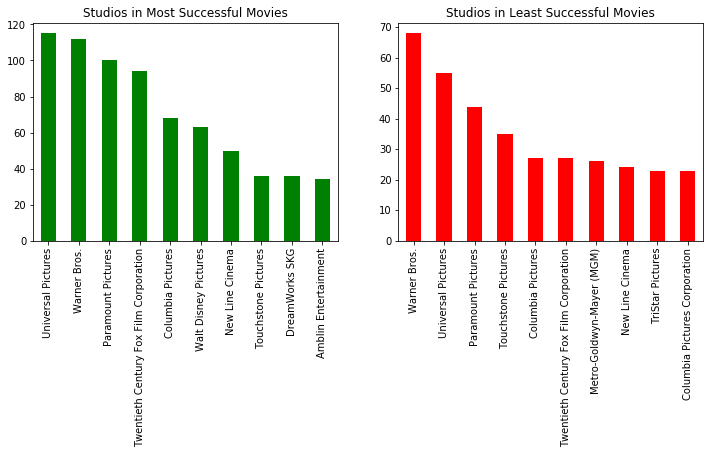

In [49]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)

prod_suc.plot.bar(ax=axs[0], color = 'g').set_title('Studios in Most Successful Movies')
prod_low.plot.bar(ax=axs[1], color = 'r').set_title('Studios in Least Successful Movies')

plt.show()

In this case is difficult to give a concrete answer, because it seems to be the same set of studios on both sides this might be explained by the fact that those studios (Universal, Warner, etc) are the ones that dominate the market.

<a id='conclusions'></a>
## Conclusions

After analysing the data on what it takes to make a successful movie, it seems that on average the budget should be around  40275147.33 USD and the average duration 107 minutes. Any selection of the dominating studios in Holywood and with the direction of Spielberg, Scott, Eastwood and Burton and with actors like Tom Cruise or Tom Hanks


**Vote Average vs Success**

In our analysis was clear that the higher the profit then the higher the average vote (by a really low margin). But, can we tell if the vote average influences the earnings of a movie? With the data we have no, because it's unclear on what are the viewer's driving factors. For example: does someone goes to the movie theater because of a high voting average? although "common sense" might push us to say yes with the data we have, we cannot know for sure


**Conclusiveness**

If we compare movies labeled with earning level low vs very high, it's possible to identify some overlapping data points for example: Bruce Willis, Universal and this makes totally sense given the amount of movies produced by those studios and with the same "A list" actors/directors, so even though having Bruce Willis in a movie could lead to a higher revenue this is not always the case.

<a id='lim'></a>
## Limitations

Among the difficulties associated to this project it's worthwile to mention:
* Untidy data: specially with Casting or Directors, each name was separated using |, this required the creation of a funtion to separate and count the different names
* Lack of information on the units of vote, this made difficult the analysis of the vote/popularity of each movie, moreover as noted in the conclusions is also difficult to establish proper connection between popularity (vote) and success solely with the information we have. 
* If we wanted to determine the factors that lead to a successful movie it could be also helpful to understand users preferences, just by looking at this data we could identify patterns with regard to actors, directors, studios, budget and category (drama/comedy) however there is no guarantee that this combination will always lead to a high earning movie.


## References

- How to plot different lists:
https://pythonspot.com/matplotlib-bar-chart/, 
https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure
- How to concatenate and split strings:
https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
- General pandas documentation:
http://pandas.pydata.org/pandas-docs/stable/

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0